## EDA ANALYSIS FOR THE GIVEN FINANCE JOURNALS DATASET

### Lets Import the necessery Liberaries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('e-finance dataset.csv')
df.head()

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Access Type,Source,EID
0,"Beni E.H., Lagaisse B., Joosen W., Aly A., Bra...",57189258279;8933999000;22834655700;55841871100...,Datablinder: A distributed data protection mid...,2019,Middleware Industry 2019 - Proceedings of the ...,NaN,NaN,NaN,50,57.0,...,9781450370417,NaN,NaN,English,Middlew. Ind. - Proc. Int. Middlew. Conf. Ind....,Conference Paper,Final,Open Access,Scopus,2-s2.0-85078939286
1,"Xiong H., Zhou Y.",57212174318;57212168803;,Construction and Application of Ocean Shipping...,2019,Journal of Coastal Research,97,sp1,NaN,29,34.0,...,NaN,JCRSE,NaN,English,J. Coast. Res.,Article,Final,NaN,Scopus,2-s2.0-85076117139
2,"Feng L., Zhang H., Tsai W.-T., Sun S.",57194783804;56979549200;57050382000;57197771738;,System architecture for high-performance permi...,2019,Frontiers of Computer Science,13,6,NaN,1151,1165.0,...,NaN,NaN,NaN,English,Front. Comput. Sci.,Article,Final,NaN,Scopus,2-s2.0-85051801026
3,"Rožkalne Z., Mukāns M., Vētra A.",57211844555;56074676500;6506045608;,Transition-age young adults with cerebral pals...,2019,Medicina (Lithuania),55,11,737,NaN,NaN,...,NaN,NaN,31739609.0,English,Medicina,Article,Final,Open Access,Scopus,2-s2.0-85075115419
4,"Alshubiri F., Jamil S.A., Elheddad M.",56539905200;56770916900;57195032630;,The impact of ICT on financial development: Em...,2019,International Journal of Engineering Business ...,11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,English,Intern. J. Eng. Bus. Manage.,Article,Final,Open Access,Scopus,2-s2.0-85071721834


In [4]:
df.shape

(228, 46)

In [5]:
df.describe(include="all")

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Access Type,Source,EID
count,228,228,228,228.000000,227,180,147,27,206,199.000000,...,66,27,4.000000e+00,228,218,228,228,16,228,228
unique,210,209,224,NaN,146,75,23,27,165,NaN,...,64,23,NaN,4,142,7,1,1,1,228
top,Martin P.L.,57188559538;,E-Finance,NaN,International Journal of Electronic Finance,5,1,737,1,NaN,...,9780620471725,FACME,NaN,English,Int. J. Electron. Finance,Article,Final,Open Access,Scopus,2-s2.0-85078939286
freq,6,6,4,NaN,54,20,34,1,11,NaN,...,2,3,NaN,223,48,139,228,16,228,1
mean,NaN,NaN,NaN,2010.214912,NaN,NaN,NaN,NaN,NaN,723.462312,...,NaN,NaN,2.013451e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,6.172437,NaN,NaN,NaN,NaN,NaN,5156.031031,...,NaN,NaN,9.310620e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1981.000000,NaN,NaN,NaN,NaN,NaN,3.000000,...,NaN,NaN,1.030222e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,NaN,NaN,100.500000,...,NaN,NaN,1.424886e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,206.000000,...,NaN,NaN,1.924810e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,416.000000,...,NaN,NaN,2.513375e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### From the count row, we can see that the total number of observation is 228, and the year range is from 1981 to 2019.

In [6]:
#The Percentage of missing values in the dataset

null_percenatges = (df.isnull().sum()/df.shape[0])*100
null_percenatges

Authors                            0.000000
Author(s) ID                       0.000000
Title                              0.000000
Year                               0.000000
Source title                       0.438596
Volume                            21.052632
Issue                             35.526316
Art. No.                          88.157895
Page start                         9.649123
Page end                          12.719298
Page count                        98.245614
Cited by                          32.894737
DOI                               23.684211
Link                               0.000000
Affiliations                       6.140351
Authors with affiliations          0.877193
Abstract                           0.000000
Author Keywords                   21.052632
Index Keywords                    55.701754
Molecular Sequence Numbers       100.000000
Chemicals/CAS                    100.000000
Tradenames                       100.000000
Manufacturers                   

#### We will have to drop the columns with null values above 60%.  

In [7]:
threshold = (60 / 100) * df.shape[0] #This is the threshold number of observations that can be null
isnull_per_column = df.isnull().sum() 
useful_features = isnull_per_column[isnull_per_column < threshold].index #Removing the needed columns/features from all the columns
df = df[useful_features] 

In [8]:
#Check the dataset again

df.isnull().sum()

Authors                            0
Author(s) ID                       0
Title                              0
Year                               0
Source title                       1
Volume                            48
Issue                             81
Page start                        22
Page end                          29
Cited by                          75
DOI                               54
Link                               0
Affiliations                      14
Authors with affiliations          2
Abstract                           0
Author Keywords                   48
Index Keywords                   127
References                        16
Correspondence Address            37
Publisher                         88
ISSN                              54
Language of Original Document      0
Abbreviated Source Title          10
Document Type                      0
Publication Stage                  0
Source                             0
EID                                0
d

#### From the above count values, we have dropped Columns with empty entries above 60%

In [9]:
df['Language of Original Document'].unique()

array(['English', 'Polish', 'Chinese', 'German'], dtype=object)

In [10]:
language_count=df.groupby('Language of Original Document')['Language of Original Document'].count()
language_count

Language of Original Document
Chinese      2
English    223
German       2
Polish       1
Name: Language of Original Document, dtype: int64

#### From the above array, we can see that the Journals are from four languages. English,Polish,Chinese,German. The most is English

In [11]:
df["Year"].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 1988, 1986, 1984,
       1981], dtype=int64)

We can get all the available years in a list by getting the unique values in the year column

In [12]:
years = sorted(list(df["Year"].unique()))
years

[1981,
 1984,
 1986,
 1988,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

We can also get the distribution of the dataset in the number of journals we have per year

In [13]:
year_count = df["Year"].value_counts().sort_index()
year_count

1981     2
1984     1
1986     1
1988     1
2001     5
2002     8
2003     4
2004     7
2005    10
2006    15
2007    13
2008     9
2009     4
2010    19
2011    35
2012    19
2013    13
2014     9
2015    11
2016     7
2017    11
2018     9
2019    15
Name: Year, dtype: int64

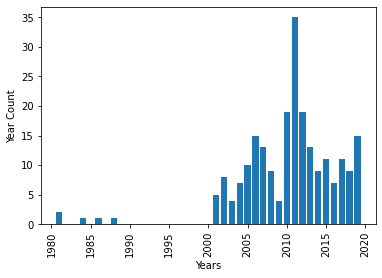

In [14]:
plt.bar(years,year_count)
plt.xticks(rotation=90)
plt.ylabel('Year Count')
plt.xlabel('Years')
plt.show()

#### From the above plot, we can see the most jornals are dated 2011 from the dataset.

In [15]:
#Converting the values in the author and author ID columns into lists
df["Authors"] = df["Authors"].map(lambda x: x.split(","))
df["Author(s) ID"] = df["Author(s) ID"].map(lambda x: x.split(";"))

#Creating a new column in the df that combines the authors with their id in a tuple
df["Authors_withID"] = None
for i in range(df.shape[0]):
    df["Authors_withID"][i] = list(zip(df["Authors"][i], df["Author(s) ID"][i]))

df["Authors_withID"][0]

C:\apps\anaconda3\envs\py3.0-TF2.0\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[('Beni E.H.', '57189258279'),
 (' Lagaisse B.', '8933999000'),
 (' Joosen W.', '22834655700'),
 (' Aly A.', '55841871100'),
 (' Brackx M.', '55387606200')]

In [16]:
authors_dict = {}
for row in df["Authors"]:
    for author in row:
        if author in authors_dict:
            authors_dict[author] += 1
        else:
            authors_dict[author] = 1

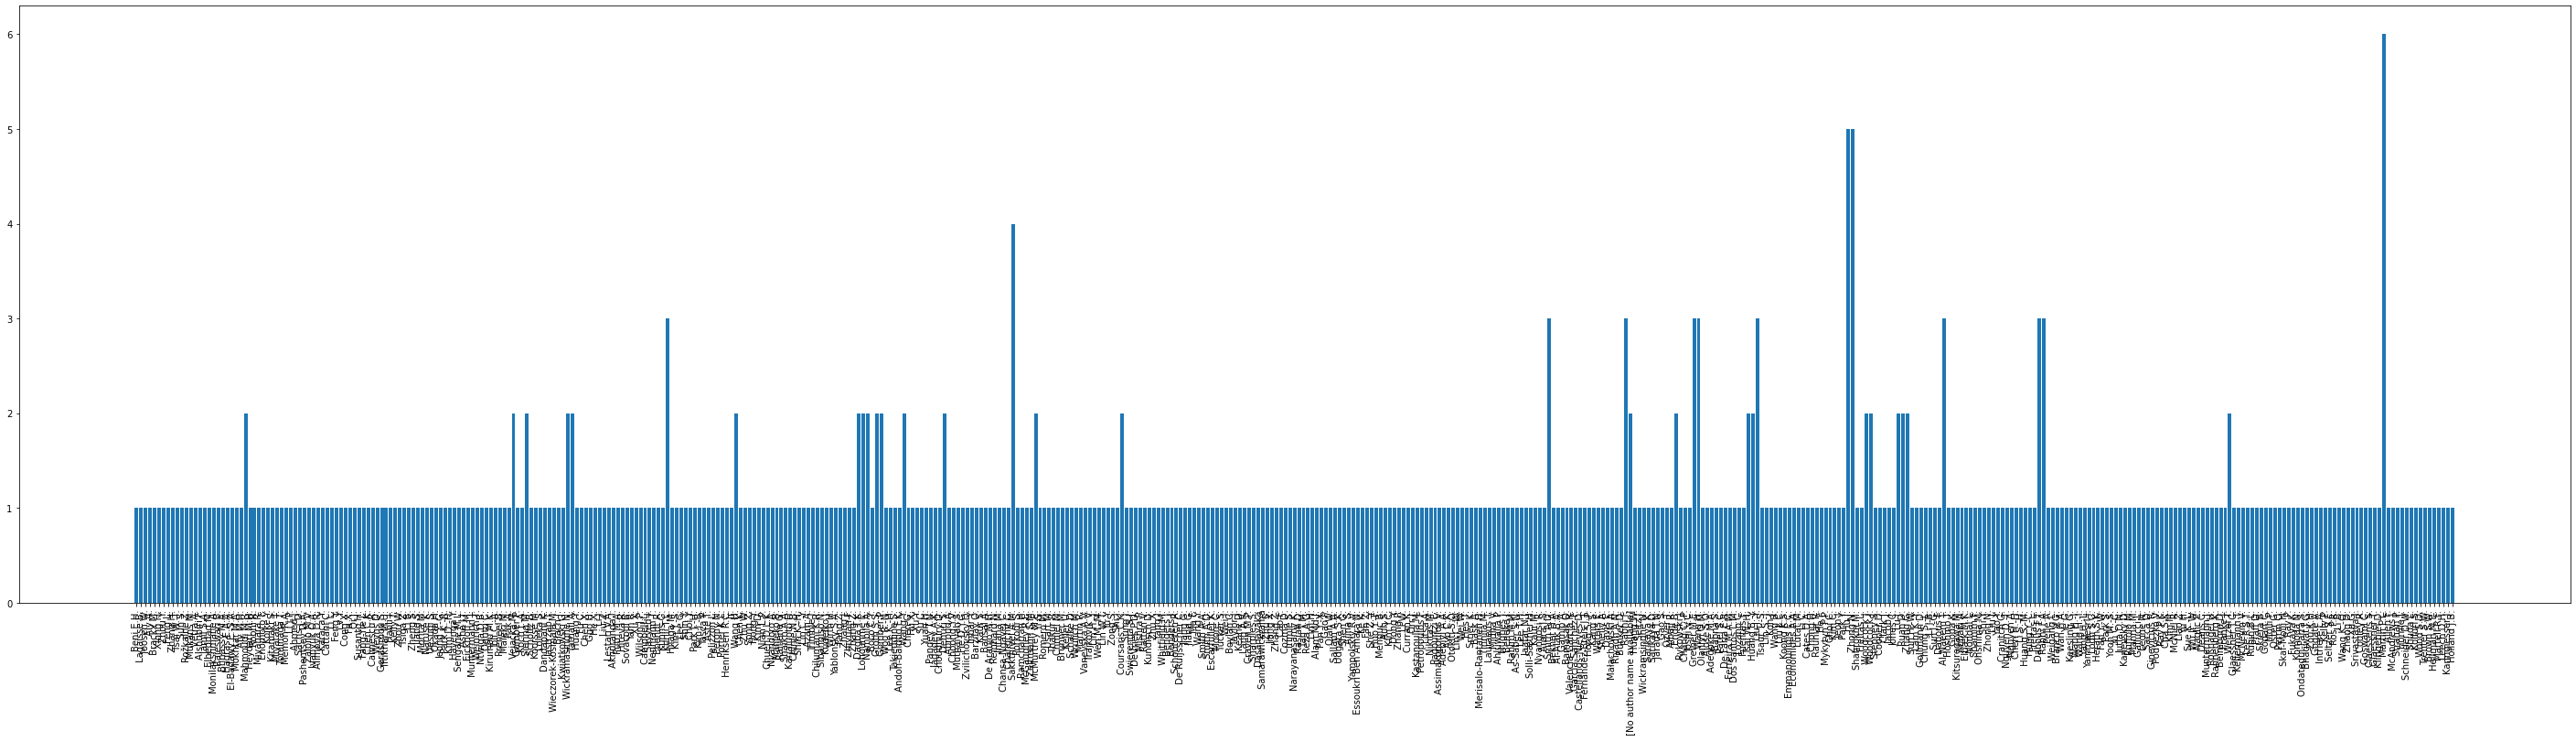

In [17]:
y_values = list(authors_dict.values())
authors = list(authors_dict.keys())
plt.figure(figsize=(50, 12))
plt.bar(range(len(authors_dict)), y_values, tick_label=authors)
plt.xticks(rotation=90)
plt.show()

The plot above is messy because we have about 511 unique authors and we can see that the highest number of journals by a single author is 6

In [18]:
df.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Page start', 'Page end', 'Cited by', 'DOI', 'Link',
       'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'References',
       'Correspondence Address', 'Publisher', 'ISSN',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Source', 'EID',
       'Authors_withID'],
      dtype='object')

In order to get some insight into the trend in the finance industry from the given years, we can explore the abstracts column

Below, we are going to cut the years into a group of ranges since from the given distribution of the abstracts we have per year, the data is very uneven.

In [20]:
df_1 = df.copy()
df_1["year_groups"] = pd.cut(df_1["Year"], 
                             bins = [1981, 2006, 2011, 2015, np.inf], 
                             labels = ["1981-2005", "2006-2010", "2011-2014", "2015-2019"])


df_1["Abstract"] = df["Abstract"].astype(str)
df_aggregated = df_1[['year_groups', 'Abstract']].groupby("year_groups").sum()

#Resetting the index
df_1 = df_1.reset_index()
df_1["year_groups"].value_counts()

2006-2010    80
1981-2005    52
2011-2014    52
2015-2019    42
Name: year_groups, dtype: int64

Below, we are going to check the distribution of the number of characters used per abstract

Text(0, 0.5, 'Frequency')

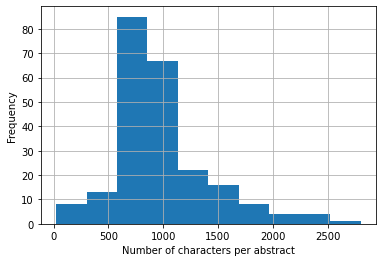

In [21]:
df_1["Abstract"].str.len().hist()
plt.xlabel("Number of characters per abstract")
plt.ylabel("Frequency")

We are also going to check the number of words used per abstract

Text(0, 0.5, 'Frequency')

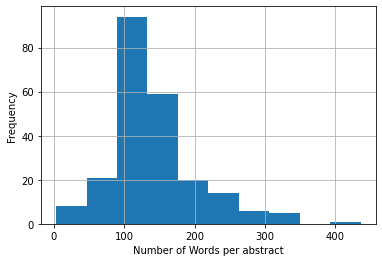

In [22]:
df_1["Abstract"].str.split().map(lambda x: len(x)).hist() #This line converts the text abstracts into a list of slit words and counts the words with the len function
plt.xlabel("Number of Words per abstract")
plt.ylabel("Frequency")

The number of words used in each of the abstracts range from 50 - 340 words. The average word length is from 70 - 180 words from the graph seen above

In [23]:
df_aggregated

,Abstract
year_groups,
1981-2005,We describe our experiences in mechanising the...
2006-2010,"As a new channel of loan, network loan is more..."
2011-2014,Background: Online peer-to-peer lending (P2P l...
2015-2019,Business application owners want to outsource ...


In [24]:
df_aggregated = df_aggregated.reset_index()
df_aggregated

,year_groups,Abstract
0,1981-2005,We describe our experiences in mechanising the...
1,2006-2010,"As a new channel of loan, network loan is more..."
2,2011-2014,Background: Online peer-to-peer lending (P2P l...
3,2015-2019,Business application owners want to outsource ...


In [25]:
#Importing the necessary libraries
import re
import string
import nltk 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stopwords = set(stopwords.words("english"))

In [26]:
def clean_abstracts(row, tokenizer, stopwords):
    """Pre-process row and generate word tokens

    Args:
        row: Text to tokenize.

    Returns:
        Tokenized row.
    """
    row = str(row).lower()  # Lowercase words
    row = re.sub(r"\s+", " ", row)  # Remove multiple spaces in content
    row = re.sub(f"[{re.escape(string.punctuation)}]", "", row)  # Remove punctuations

    tokens = tokenizer(row)  # Get tokens from row
    tokens = [t for t in tokens if not t in stopwords]  # Remove stopwords
    tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    tokens = [t for t in tokens if len(t) > 2]  # Remove short tokens
    return tokens

In [27]:
from collections import Counter

#Creating a function to draw the word freguency chart for the words mostly used in some range of years
def draw_word_frequency(year_range, Abstracts):
    """Draw a freuency graph for the words that we have in each year range

    Args:
        year_range: The intended year range in string format
        Abstracts: The text document we are drawning a word frequency graph for

    Returns:
        A bar plot
    """
    counter = Counter(Abstracts)
    most = counter.most_common()

    x, y= [], []
    for word, count in most[:20]:
        x.append(word)
        y.append(count)
    plt.title(year_range)        
    sns.barplot(x=y, y=x)

In [28]:
#Cleaning the data with the created function
df_aggregated["Abstract_words"] = df_aggregated["Abstract"].map(lambda x: clean_abstracts(x, nltk.word_tokenize, stopwords))

df_aggregated.head()

,year_groups,Abstract,Abstract_words
0,1981-2005,We describe our experiences in mechanising the...,"[describe, experiences, mechanising, specifica..."
1,2006-2010,"As a new channel of loan, network loan is more...","[new, channel, loan, network, loan, suitable, ..."
2,2011-2014,Background: Online peer-to-peer lending (P2P l...,"[background, online, peertopeer, lending, p2p,..."
3,2015-2019,Business application owners want to outsource ...,"[business, application, owners, want, outsourc..."


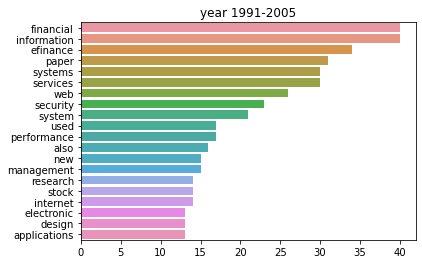

In [29]:
draw_word_frequency("year 1991-2005", df_aggregated.loc[0, "Abstract_words"])

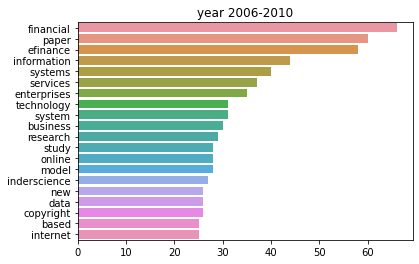

In [30]:
draw_word_frequency("year 2006-2010", df_aggregated.loc[1, "Abstract_words"])

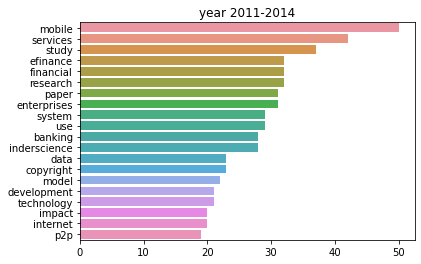

In [31]:
draw_word_frequency("year 2011-2014", df_aggregated.loc[2, "Abstract_words"])

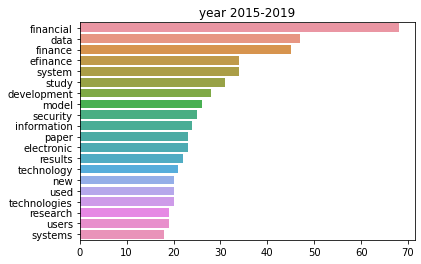

In [32]:
draw_word_frequency("year 2015-2019", df_aggregated.loc[3, "Abstract_words"])

In [33]:
def clean_abstracts2(row, tokenizer, stopwords):
    """Pre-process row and generate corpus

    Args:
        row: Text to tokenize.

    Returns:
       sentence Tokenized row.
    """
    sentences = tokenizer(row)
    corpus = []
    wordnet = WordNetLemmatizer()
    
    for i in range(len(sentences)):
        review = re.sub("[^a-zA-Z]", " ", sentences[i])
        review = review.lower()
        review = review.split() #The output of this is a list
        review = [wordnet.lemmatize(word) for word in review if word not in stopwords]
        review = " ".join(review) #Convert the list back to a string
        corpus.append(review)
    return corpus

In [34]:
df_aggregated["Abstract_sentences"] = df_aggregated["Abstract"].map(lambda x: clean_abstracts2(x, nltk.sent_tokenize, stopwords))

In [35]:
df_aggregated

,year_groups,Abstract,Abstract_words,Abstract_sentences
0,1981-2005,We describe our experiences in mechanising the...,"[describe, experiences, mechanising, specifica...",[describe experience mechanising specification...
1,2006-2010,"As a new channel of loan, network loan is more...","[new, channel, loan, network, loan, suitable, ...",[new channel loan network loan suitable tradit...
2,2011-2014,Background: Online peer-to-peer lending (P2P l...,"[background, online, peertopeer, lending, p2p,...",[background online peer peer lending p p lendi...
3,2015-2019,Business application owners want to outsource ...,"[business, application, owners, want, outsourc...",[business application owner want outsource dat...


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams_barchart(num_grams, dataframe):
    """Plot the top_n grams frequency graph

    Args:
        num_grams: Intended number of grams
        dataframe: The dataframe we are working with

    Returns:
       A bar plot of n_grams per year range in all the year ranges
    """
    def _get_top_ngram(corpus, n=None):
        """Get the top n_grams from the text document (corpus)

        Args:
            n: Number of grams to get
            corpus: The text document from which we are getting the n_grams

        Returns:
            The top 20 n_grams with their frequency
        """
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) #Adding all the occurences of the words in each sentence
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()] #Since we essentially have only one row now we select the word count per idx(word)
        words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True) #Sort by the counts
        return words_freq[:20] 
    
    fig, axes = plt.subplots(2, 2, figsize=(29,13))
    fig.suptitle("Top {} grams".format(num_grams))
    for i in range(4):
        top_n_bigrams = _get_top_ngram(dataframe["Abstract_sentences"][i], num_grams)
        x, y = map(list, zip(*top_n_bigrams))
        if i < 2:
            axes[0, i].set_title('Top {} grams for the years {}'.format(num_grams, dataframe["year_groups"][i]))
            sns.barplot(x=y, y=x, ax=axes[0, i])
        else:
            axes[1, i - 2].set_title('Top {} grams for the years {}'.format(num_grams, dataframe["year_groups"][i]))
            sns.barplot(x=y, y=x, ax=axes[1, i - 2])

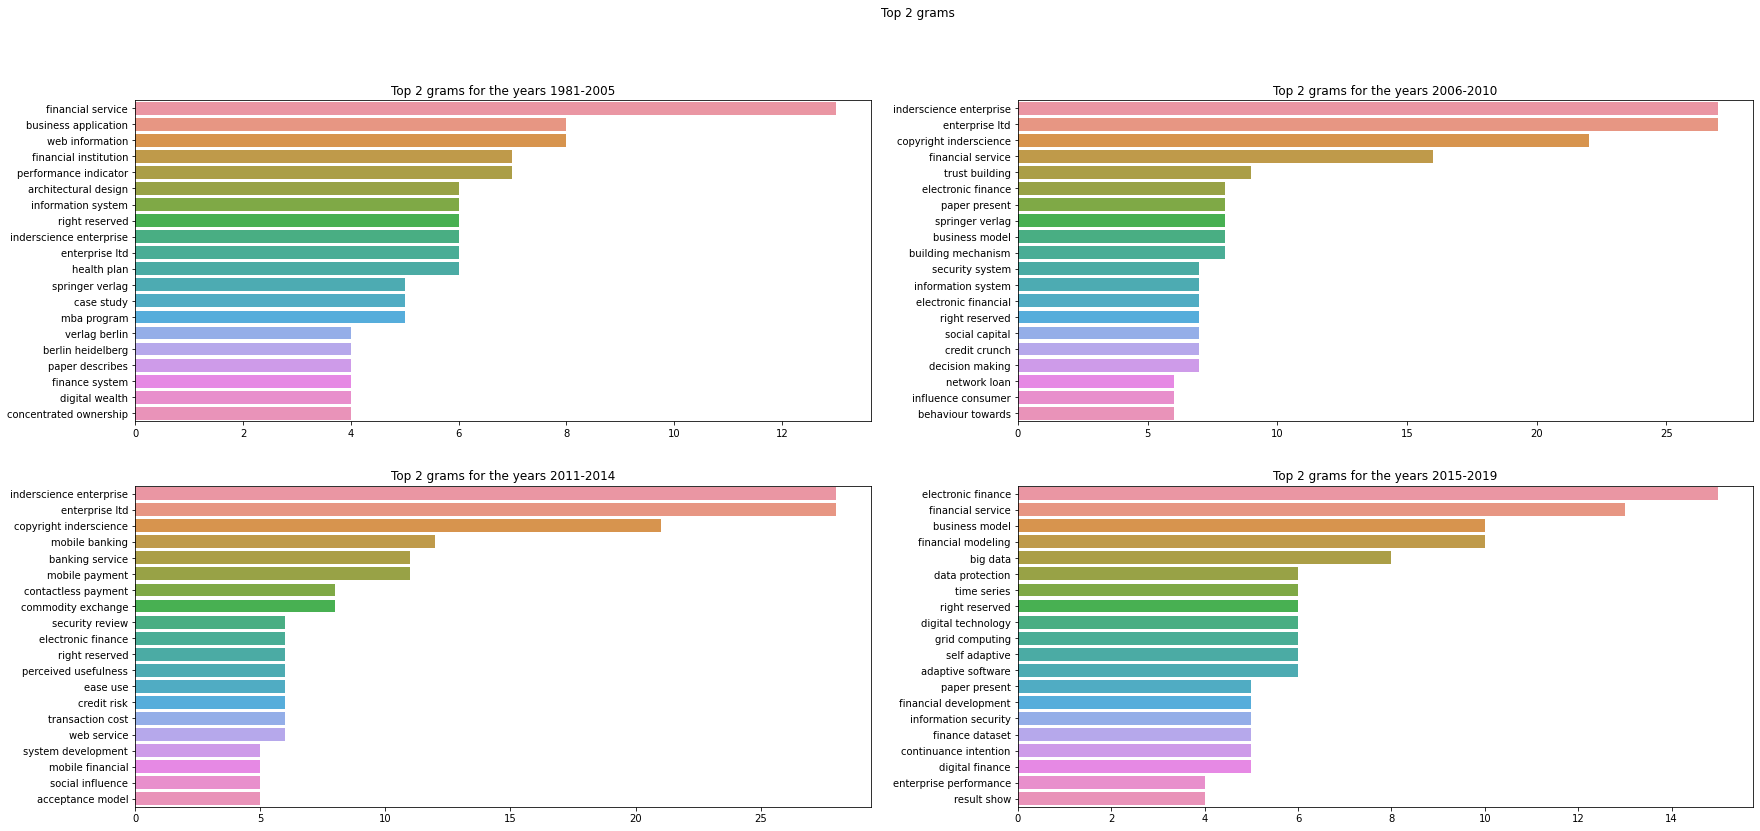

In [37]:
plot_top_ngrams_barchart(num_grams=2, dataframe=df_aggregated)

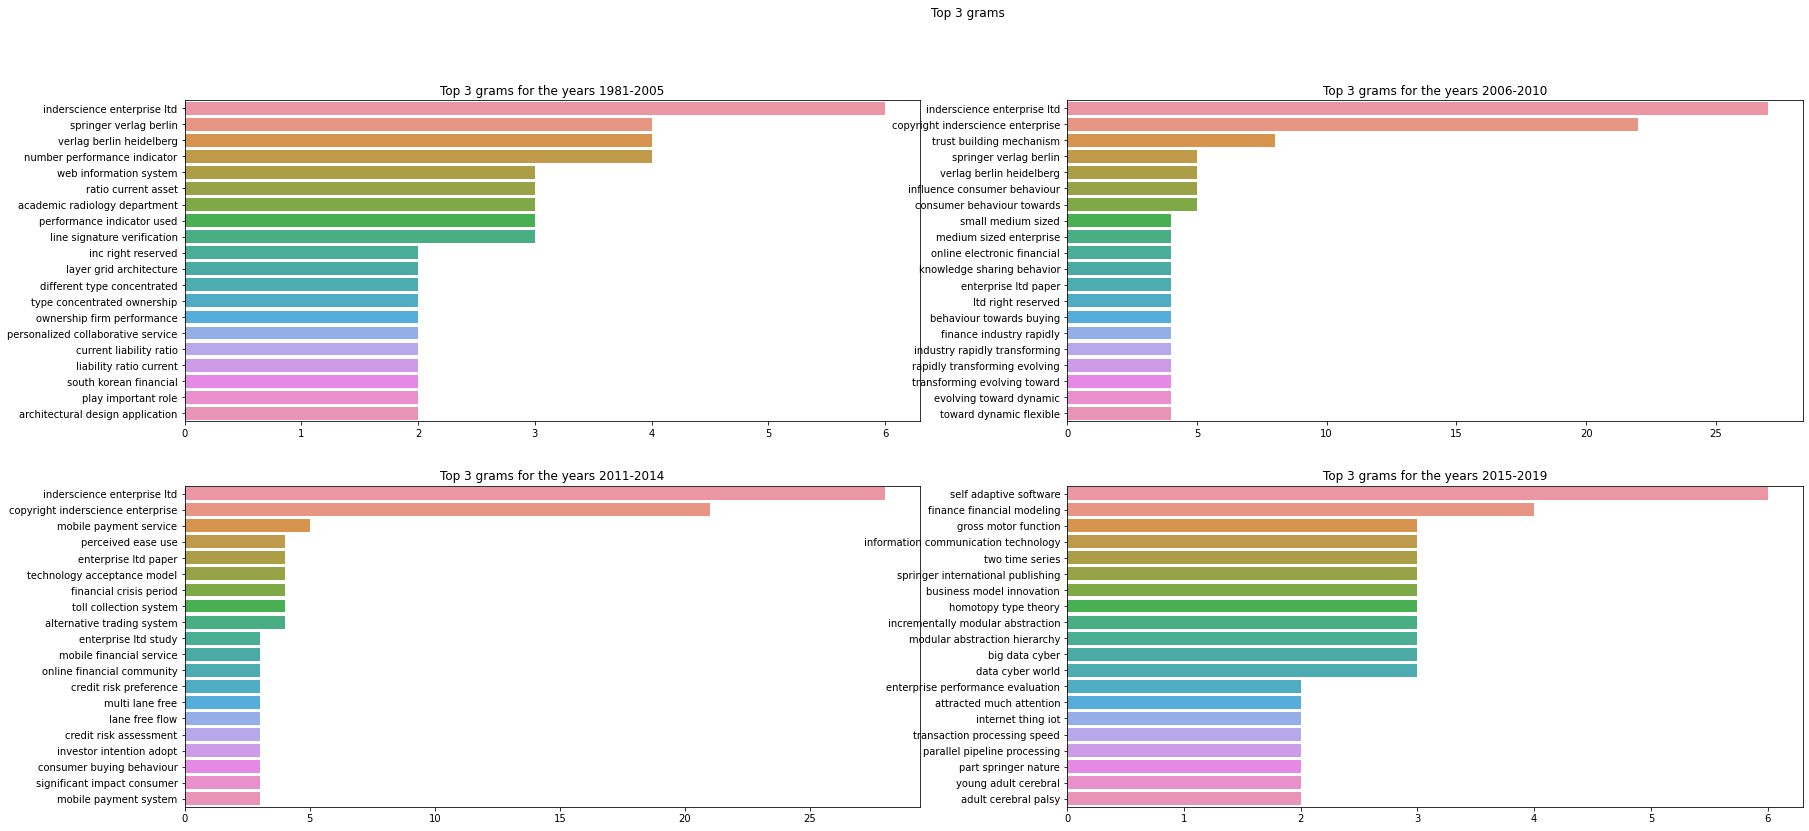

In [38]:
plot_top_ngrams_barchart(num_grams=3, dataframe=df_aggregated)